Import Libraries, Define Image Loading Function

In [1]:
library(pixmap)  
library(gdata)
library(neuralnet)

loadImages <- function(pathName,fileNames, classLabel) {

    files<-list.files(path=pathName,pattern=fileNames,all.files=T,full.name=T,no..=T)

    list_of_images=lapply(files,read.pnm)
    n.images<-length(list_of_images)

    image.matrix<-list_of_images[[1]]@grey
    image.vector<-unmatrix(image.matrix,byrow=T)

    for(ii in 2:n.images) {
        i.matrix<-list_of_images[[ii]]@grey
        i.vector<-unmatrix(i.matrix,byrow=T)
        image.vector<-rbind(image.vector,i.vector)
    }

    image.frame<-data.frame(image.vector)
    n.rows<-nrow(image.frame)
    class1.label<-rep(classLabel,n.rows)
    image.frame<-cbind(image.frame,class1.label)

    return (image.frame)
}

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



Show Images from Each Class

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”

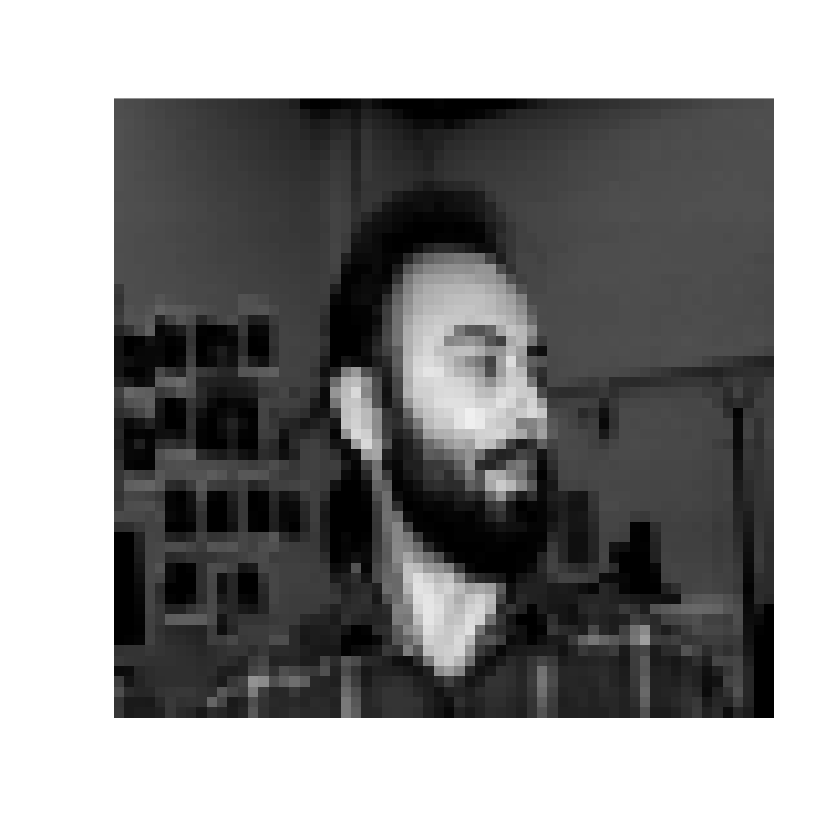

Pixmap image
  Type          : pixmapGrey 
  Size          : 60x64 
  Resolution    : 1x1 
  Bounding box  : 0 0 64 60 


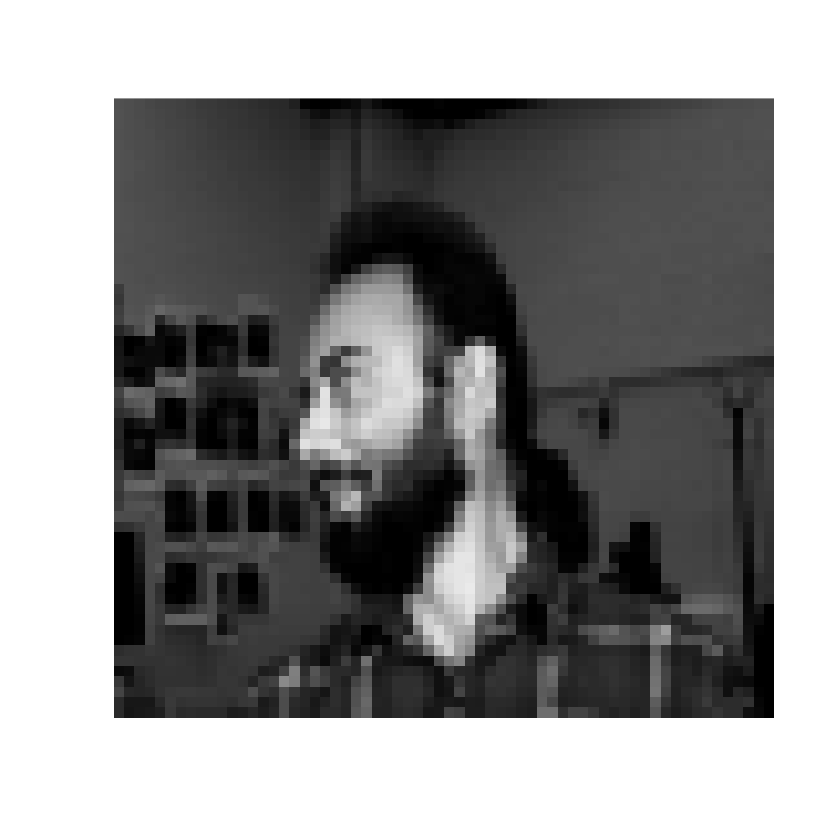

In [60]:
left1 <- read.pnm(file="/home/herzfeld2/faces/danieln_left_happy_open_2.pgm")
plot(left1)

right1 <- read.pnm(file="/home/herzfeld2/faces/danieln_right_happy_open_2.pgm")
plot(right1)

Train Networks, Predict Labels and Report Performances

In [3]:
right.frame <- loadImages("/home/herzfeld2/faces","right*.*",1)
right.frame

left.frame <- loadImages("/home/herzfeld2/faces","left*.*",-1)
left.frame

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the 

r1.c1      r1.c2       r1.c3      r1.c4      r1.c5     r1.c6     r1.c7    
1  0.11612903 0.006451613 0.05806452 0.40000000 0.2322581 0.1612903 0.1806452
2  0.12101911 0.006369427 0.06369427 0.40764331 0.2356688 0.1656051 0.1847134
3  0.10828025 0.006369427 0.05732484 0.38853503 0.2229299 0.1592357 0.1719745
4  0.12101911 0.006369427 0.06369427 0.41401274 0.2356688 0.1656051 0.1847134
5  0.30128205 0.378205128 0.23076923 0.23717949 0.2435897 0.3141026 0.4358974
6  0.12179487 0.006410256 0.06410256 0.41666667 0.2435897 0.1730769 0.1858974
7  0.10897436 0.006410256 0.05128205 0.38461538 0.2243590 0.1538462 0.1666667
8  0.12179487 0.006410256 0.06410256 0.41666667 0.2371795 0.1666667 0.1858974
9  0.20325203 0.195121951 0.18699187 0.18699187 0.1788618 0.1788618 0.1707317
10 0.22047244 0.212598425 0.20472441 0.18897638 0.1811024 0.1811024 0.1732283
11 0.19166667 0.183333333 0.17500000 0.17500000 0.1666667 0.1583333 0.1583333
12 0.20161290 0.201612903 0.19354839 0.19354839 0.1854839 0.1774194 0.1693548
13 0.19327731 0.184873950 0.18487395 0.17647059 0.1680672 0.1596639 0.1512605
14 0.19200000 0.192000000 0.19200000 0.18400000 0.1760000 0.1680000 0.1600000
15 0.19166667 0.191666667 0.18333333 0.18333333 0.1750000 0.1750000 0.1666667
16 0.20161290 0.193548387 0.19354839 0.18548387 0.1774194 0.1693548 0.1612903
17 0.23026316 0.230263158 0.22368421 0.21710526 0.2105263 0.2039474 0.2039474
18 0.23566879 0.222929936 0.22292994 0.21656051 0.2101911 0.2038217 0.2038217
19 0.22666667 0.220000000 0.21333333 0.20666667 0.2066667 0.2000000 0.1933333
20 0.23076923 0.224358974 0.22435897 0.21794872 0.2115385 0.2051282 0.1987179
21 0.23178808 0.225165563 0.22516556 0.21854305 0.2119205 0.2052980 0.1986755
22 0.23717949 0.230769231 0.22435897 0.21794872 0.2179487 0.2051282 0.2051282
23 0.22516556 0.218543046 0.21192053 0.21192053 0.2052980 0.1986755 0.1920530
24 0.23076923 0.224358974 0.21794872 0.21153846 0.2115385 0.2051282 0.2051282
25 0.20325203 0.195121951 0.18699187 0.17886179 0.1707317 0.1707317 0.1626016
26 0.32692308 0.314102564 0.30128205 0.29487179 0.2820513 0.2692308 0.2628205
27 0.33333333 0.320512821 0.30769231 0.30128205 0.2884615 0.2756410 0.2692308
28 0.31210191 0.305732484 0.29299363 0.28025478 0.2675159 0.2611465 0.2547771
29 0.32484076 0.312101911 0.30573248 0.28662420 0.2802548 0.2738854 0.2611465
30 0.31410256 0.301282051 0.29487179 0.28205128 0.2692308 0.2628205 0.2500000
31 0.31847134 0.312101911 0.29936306 0.28662420 0.2738854 0.2675159 0.2547771
32 0.31210191 0.299363057 0.29299363 0.28025478 0.2738854 0.2611465 0.2484076
33 0.34193548 0.329032258 0.31612903 0.30322581 0.2903226 0.2838710 0.2774194
34 0.17333333 0.260000000 0.31333333 0.28000000 0.2466667 0.2400000 0.2400000
35 0.15972222 0.243055556 0.29861111 0.26388889 0.2291667 0.2291667 0.2222222
36 0.15753425 0.239726027 0.29452055 0.26027397 0.2260274 0.2328767 0.2260274
37 0.15540541 0.243243243 0.29729730 0.26351351 0.2297297 0.2229730 0.2229730
38 0.16778523 0.255033557 0.30872483 0.27516779 0.2416107 0.2416107 0.2348993
39 0.01438849 0.050359712 0.00000000 0.09352518 0.3093525 0.2446043 0.2446043
40 0.01418440 0.049645390 0.00000000 0.09929078 0.3049645 0.2411348 0.2411348
41 0.02127660 0.049645390 0.00000000 0.09929078 0.3120567 0.2482270 0.2482270
42 0.01438849 0.043165468 0.00000000 0.09352518 0.3093525 0.2446043 0.2446043
43 0.02112676 0.049295775 0.00000000 0.09154930 0.3169014 0.2464789 0.2464789
44 0.01438849 0.035971223 0.00000000 0.08633094 0.3021583 0.2302158 0.2374101
45 0.11764706 0.000000000 0.00000000 0.00000000 0.0130719 0.3398693 0.3986928
46 0.28205128 0.275641026 0.26923077 0.26282051 0.2500000 0.2500000 0.2371795
47 0.29032258 0.277419355 0.27096774 0.26451613 0.2580645 0.2516129 0.2451613
48 0.28387097 0.277419355 0.27096774 0.26451613 0.2580645 0.2516129 0.2451613
49 0.29677419 0.290322581 0.28387097 0.27741935 0.2645161 0.2580645 0.2516129
50 0.27564103 0.269230769 0.26282051 0.25641026 0.2435897 0.2371795 0.2371795
   r1.c8     r1.c9     r1

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”Warning message in rep(cellres, length = 2):
“'x' is NULL so the 

r1.c1      r1.c2       r1.c3      r1.c4       r1.c5      r1.c6     
1  0.10897436 0.006410256 0.05128205 0.371794872 0.21794872 0.15384615
2  0.00000000 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000
3  0.10897436 0.000000000 0.05128205 0.384615385 0.22435897 0.15384615
4  0.11464968 0.006369427 0.06369427 0.401273885 0.22929936 0.15923567
5  0.28846154 0.365384615 0.21794872 0.230769231 0.23717949 0.30128205
6  0.11464968 0.006369427 0.07006369 0.407643312 0.23566879 0.16560510
7  0.10191083 0.006369427 0.05095541 0.375796178 0.21656051 0.15286624
8  0.11538462 0.006410256 0.05769231 0.403846154 0.23076923 0.16025641
9  0.19512195 0.195121951 0.18699187 0.178861789 0.17073171 0.17073171
10 0.20769231 0.200000000 0.20000000 0.192307692 0.18461538 0.17692308
11 0.18852459 0.180327869 0.17213115 0.163934426 0.16393443 0.15573770
12 0.20634921 0.198412698 0.19841270 0.190476190 0.18253968 0.17460317
13 0.17500000 0.175000000 0.16666667 0.166666667 0.15833333 0.15000000
14 0.20000000 0.192000000 0.19200000 0.184000000 0.17600000 0.16800000
15 0.19834711 0.190082645 0.18181818 0.173553719 0.17355372 0.16528926
16 0.19841270 0.198412698 0.19047619 0.182539683 0.17460317 0.17460317
17 0.24161074 0.228187919 0.22147651 0.214765101 0.21476510 0.20805369
18 0.21935484 0.212903226 0.21290323 0.206451613 0.20000000 0.19354839
19 0.24324324 0.229729730 0.22297297 0.216216216 0.20945946 0.20945946
20 0.21935484 0.212903226 0.20645161 0.206451613 0.20000000 0.19354839
21 0.22368421 0.217105263 0.21710526 0.210526316 0.21052632 0.20394737
22 0.22580645 0.225806452 0.21935484 0.212903226 0.20645161 0.20000000
23 0.24000000 0.226666667 0.22000000 0.213333333 0.21333333 0.20666667
24 0.22580645 0.219354839 0.21290323 0.212903226 0.20645161 0.20645161
25 0.20800000 0.200000000 0.20000000 0.184000000 0.17600000 0.17600000
26 0.26623377 0.259740260 0.25324675 0.240259740 0.23376623 0.23376623
27 0.27272727 0.259740260 0.25324675 0.246753247 0.24025974 0.23376623
28 0.30573248 0.299363057 0.29299363 0.280254777 0.26751592 0.26114650
29 0.33974359 0.326923077 0.31410256 0.301282051 0.29487179 0.28205128
30 0.30769231 0.294871795 0.28846154 0.275641026 0.26282051 0.25641026
31 0.32278481 0.316455696 0.30379747 0.291139241 0.27848101 0.26582278
32 0.30769231 0.294871795 0.28846154 0.269230769 0.26282051 0.25000000
33 0.32692308 0.314102564 0.30128205 0.288461538 0.27564103 0.26923077
34 0.03821656 0.038216561 0.03821656 0.038216561 0.03184713 0.03184713
35 0.33757962 0.324840764 0.31210191 0.305732484 0.29299363 0.28025478
36 0.29801325 0.291390728 0.28476821 0.284768212 0.27814570 0.27152318
37 0.01449275 0.043478261 0.00000000 0.094202899 0.30434783 0.23913043
38 0.01408451 0.042253521 0.00000000 0.098591549 0.30985915 0.24647887
39 0.04109589 0.020547945 0.00000000 0.006849315 0.06849315 0.12328767
40 0.11111111 0.000000000 0.00000000 0.000000000 0.01307190 0.32679739
41 0.00000000 0.000000000 0.00000000 0.020270270 0.32432432 0.34459459
42 0.10897436 0.000000000 0.00000000 0.000000000 0.01282051 0.32051282
43 0.00000000 0.000000000 0.00000000 0.020134228 0.31543624 0.34228188
44 0.12179487 0.000000000 0.00000000 0.000000000 0.01282051 0.33333333
45 0.25974026 0.253246753 0.24675325 0.240259740 0.23376623 0.22727273
46 0.26451613 0.258064516 0.24516129 0.238709677 0.23225806 0.22580645
47 0.26451613 0.251612903 0.24516129 0.245161290 0.23225806 0.22580645
48 0.26751592 0.254777070 0.25477707 0.242038217 0.23566879 0.22929936
49 0.27741935 0.264516129 0.25806452 0.251612903 0.23870968 0.23870968
50 0.27564103 0.262820513 0.25641026 0.250000000 0.24358974 0.23717949
   r1.c7      r1.c8      r1.c9      r1.c10      ⋯ r60.c56    r60.c57   
1  0.16666667 0.16025641 0.34615385 0.384615385 ⋯ 0.53205128 0.65384615
2  0.00000000 0.00000000 0.00000000 0.000000000 ⋯ 0.33544304 0.36075949
3  0.17307692 0.16666667 0.35256410 0.397435897 ⋯ 0.73076923 0.51282051
4  0.17834395 0.17197452 0.36305732 0.401273885 ⋯ 0.56050955 0.53503185
5  0.42307692 0.371794

In [4]:
data.frame <- rbind(right.frame, left.frame)
data.frame
dim(data.frame)

r1.c1      r1.c2       r1.c3      r1.c4       r1.c5      r1.c6     
1   0.1161290  0.006451613 0.05806452 0.4000000   0.2322581  0.1612903 
2   0.1210191  0.006369427 0.06369427 0.4076433   0.2356688  0.1656051 
3   0.1082803  0.006369427 0.05732484 0.3885350   0.2229299  0.1592357 
4   0.1210191  0.006369427 0.06369427 0.4140127   0.2356688  0.1656051 
5   0.3012821  0.378205128 0.23076923 0.2371795   0.2435897  0.3141026 
6   0.1217949  0.006410256 0.06410256 0.4166667   0.2435897  0.1730769 
7   0.1089744  0.006410256 0.05128205 0.3846154   0.2243590  0.1538462 
8   0.1217949  0.006410256 0.06410256 0.4166667   0.2371795  0.1666667 
9   0.2032520  0.195121951 0.18699187 0.1869919   0.1788618  0.1788618 
10  0.2204724  0.212598425 0.20472441 0.1889764   0.1811024  0.1811024 
11  0.1916667  0.183333333 0.17500000 0.1750000   0.1666667  0.1583333 
12  0.2016129  0.201612903 0.19354839 0.1935484   0.1854839  0.1774194 
13  0.1932773  0.184873950 0.18487395 0.1764706   0.1680672  0.1596639 
14  0.1920000  0.192000000 0.19200000 0.1840000   0.1760000  0.1680000 
15  0.1916667  0.191666667 0.18333333 0.1833333   0.1750000  0.1750000 
16  0.2016129  0.193548387 0.19354839 0.1854839   0.1774194  0.1693548 
17  0.2302632  0.230263158 0.22368421 0.2171053   0.2105263  0.2039474 
18  0.2356688  0.222929936 0.22292994 0.2165605   0.2101911  0.2038217 
19  0.2266667  0.220000000 0.21333333 0.2066667   0.2066667  0.2000000 
20  0.2307692  0.224358974 0.22435897 0.2179487   0.2115385  0.2051282 
21  0.2317881  0.225165563 0.22516556 0.2185430   0.2119205  0.2052980 
22  0.2371795  0.230769231 0.22435897 0.2179487   0.2179487  0.2051282 
23  0.2251656  0.218543046 0.21192053 0.2119205   0.2052980  0.1986755 
24  0.2307692  0.224358974 0.21794872 0.2115385   0.2115385  0.2051282 
25  0.2032520  0.195121951 0.18699187 0.1788618   0.1707317  0.1707317 
26  0.3269231  0.314102564 0.30128205 0.2948718   0.2820513  0.2692308 
27  0.3333333  0.320512821 0.30769231 0.3012821   0.2884615  0.2756410 
28  0.3121019  0.305732484 0.29299363 0.2802548   0.2675159  0.2611465 
29  0.3248408  0.312101911 0.30573248 0.2866242   0.2802548  0.2738854 
30  0.3141026  0.301282051 0.29487179 0.2820513   0.2692308  0.2628205 
⋮   ⋮          ⋮           ⋮          ⋮           ⋮          ⋮         
71  0.22368421 0.21710526  0.21710526 0.210526316 0.21052632 0.20394737
72  0.22580645 0.22580645  0.21935484 0.212903226 0.20645161 0.20000000
73  0.24000000 0.22666667  0.22000000 0.213333333 0.21333333 0.20666667
74  0.22580645 0.21935484  0.21290323 0.212903226 0.20645161 0.20645161
75  0.20800000 0.20000000  0.20000000 0.184000000 0.17600000 0.17600000
76  0.26623377 0.25974026  0.25324675 0.240259740 0.23376623 0.23376623
77  0.27272727 0.25974026  0.25324675 0.246753247 0.24025974 0.23376623
78  0.30573248 0.29936306  0.29299363 0.280254777 0.26751592 0.26114650
79  0.33974359 0.32692308  0.31410256 0.301282051 0.29487179 0.28205128
80  0.30769231 0.29487179  0.28846154 0.275641026 0.26282051 0.25641026
81  0.32278481 0.31645570  0.30379747 0.291139241 0.27848101 0.26582278
82  0.30769231 0.29487179  0.28846154 0.269230769 0.26282051 0.25000000
83  0.32692308 0.31410256  0.30128205 0.288461538 0.27564103 0.26923077
84  0.03821656 0.03821656  0.03821656 0.038216561 0.03184713 0.03184713
85  0.33757962 0.32484076  0.31210191 0.305732484 0.29299363 0.28025478
86  0.29801325 0.29139073  0.28476821 0.284768212 0.27814570 0.27152318
87  0.01449275 0.04347826  0.00000000 0.094202899 0.30434783 0.23913043
88  0.01408451 0.04225352  0.00000000 0.098591549 0.30985915 0.24647887
89  0.04109589 0.02054795  0.00000000 0.006849315 0.06849315 0.12328767
90  0.11111111 0.00000000  0.00000000 0.000000000 0.01307190 0.32679739
91  0.00000000 0.00000000  0.00000000 0.020270270 0.32432432 0.34459459
92  0.10897436 0.00000000  0.00000000 0.000000000 0.01282051 0.32051282
93  0.00000000 0.00000000  0.00000000 0.020134228 0.31543624 0.34228188
94  0.12179487 0.00000000  0.00000000 0.0000

[1]  100 3841

In [5]:
set.seed(1)
indexes <- sample(nrow(data.frame), .4*nrow(data.frame))

train.set <- data.frame[indexes,]
test.set <- data.frame[-indexes,]

In [6]:
# Neuralnet package does not accept Label~. myForm replicates this behavior (using all features)
myform <- as.formula(paste('class1.label ~ ',paste(names(train.set[!names(train.set) %in% 'class1.label']), collapse = ' + ')))

In [65]:
face.classifier <- neuralnet(myform, train.set, hidden=5, rep=100, linear.output = FALSE, threshold = 0.1)

In [66]:
label.index <- length(test.set)

face.prediction<-compute(face.classifier,test.set[,-label.index])

In [67]:
face.classification <- ifelse(face.prediction$net.result>.5,1,0)

In [68]:
tt <- table(test.set[,label.index], face.classification)

# print(face.classifier)
print(tt)

    face.classification
      0
  -1 32
  1  28
